<a href="https://colab.research.google.com/github/jonatas06ap/Classifica-o-de-imagem-com-Deep-Learning/blob/main/Metricas%26CurvaRoic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

import numpy as np

import seaborn as sns

import pandas as pd

In [3]:
tf.__version__

'2.19.0'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 32ms/step - accuracy: 0.8893 - loss: 0.3489 - val_accuracy: 0.9832 - val_loss: 0.0534
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9838 - loss: 0.0510 - val_accuracy: 0.9863 - val_loss: 0.0414
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9884 - loss: 0.0360 - val_accuracy: 0.9882 - val_loss: 0.0370
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9919 - loss: 0.0243 - val_accuracy: 0.9902 - val_loss: 0.0296
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9935 - loss: 0.0191 - val_accuracy: 0.9874 - val_loss: 0.0369


In [10]:
y_true=test_labels
y_pred=model.predict(test_images)

y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [11]:
classes=[0,1,2,3,4,5,6,7,8,9]

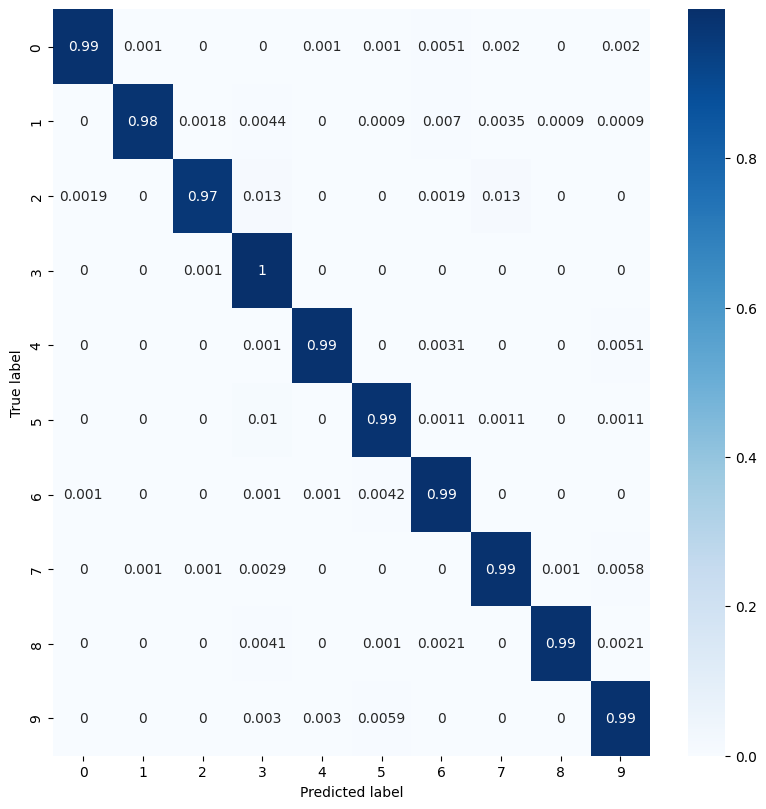

In [12]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=4)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Calculos das métricas

Valores da matriz de confusão

In [13]:
vp = []
vn = []
fp = []
fn = []

all_p = np.trace(con_mat)

sum_fp = 0
sum_fn = 0

for idx in range(len(classes)):
  vp.append(con_mat[idx][idx])
  vn.append(all_p - con_mat[idx][idx])
  for i in range(len(classes)):
    sum_fp += con_mat[i][idx]
    sum_fn += con_mat[idx][i]
  sum_fp -= con_mat[idx][idx]
  sum_fn -= con_mat[idx][idx]
  fp.append(sum_fp)
  fn.append(sum_fn)
  sum_vn = 0
  sum_fn = 0

print(vp)
print(vn)
print(fp)
print(fn)

[np.int32(968), np.int32(1113), np.int32(1002), np.int32(1009), np.int32(973), np.int32(880), np.int32(951), np.int32(1016), np.int32(965), np.int32(997)]
[np.int64(8906), np.int64(8761), np.int64(8872), np.int64(8865), np.int64(8901), np.int64(8994), np.int64(8923), np.int64(8858), np.int64(8909), np.int64(8877)]
[np.int32(3), np.int32(5), np.int32(9), np.int32(48), np.int32(53), np.int32(66), np.int32(87), np.int32(107), np.int32(109), np.int32(126)]
[np.int32(12), np.int32(22), np.int32(30), np.int32(1), np.int32(9), np.int32(12), np.int32(7), np.int32(12), np.int32(9), np.int32(12)]


Métricas

In [14]:
def get_metrics(vp, vn, fp, fn):
  acuracia = (vp + vn) / (vp + vn + fp + fn)
  sensibilidade = vp / (vp + fn)
  especificidade = vn / (vn + fp)
  precisao = vp / (vp + fp)
  f_score = 2 * ((precisao * sensibilidade) / (precisao + sensibilidade))

  return acuracia, sensibilidade, especificidade, precisao, f_score


results = []
for i in range(len(classes)):
  result = get_metrics(vp[i], vn[i], fp[i], fn[i])
  results.append(result)

print(results)

[(np.float64(0.9984831631105269), np.float64(0.9877551020408163), np.float64(0.9996632618700191), np.float64(0.9969104016477858), np.float64(0.992311635058944)), (np.float64(0.9972730027269973), np.float64(0.9806167400881057), np.float64(0.9994296144193475), np.float64(0.9955277280858676), np.float64(0.9880159786950732)), (np.float64(0.9960657722182992), np.float64(0.9709302325581395), np.float64(0.9989866006080397), np.float64(0.9910979228486647), np.float64(0.9809104258443466)), (np.float64(0.9950619772246296), np.float64(0.999009900990099), np.float64(0.994614607876136), np.float64(0.9545884578997161), np.float64(0.9762941461054669)), (np.float64(0.9937600644122383), np.float64(0.9908350305498982), np.float64(0.9940808577172213), np.float64(0.9483430799220273), np.float64(0.9691235059760955)), (np.float64(0.9921623794212219), np.float64(0.9865470852017937), np.float64(0.9927152317880795), np.float64(0.9302325581395349), np.float64(0.9575625680087051)), (np.float64(0.990569823434992)

Curva ROC

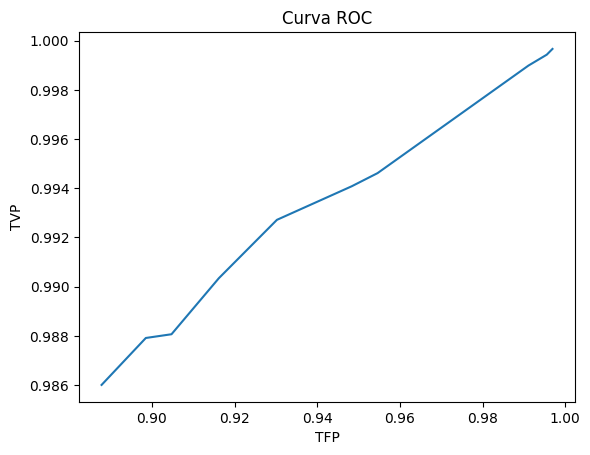

In [15]:
from re import escape
x = []
y = []

for i in range(len(classes)):
  sensibilidade = results[i][2]
  escapecificidade = results[i][3]
  x.append(escapecificidade)
  y.append(sensibilidade)


plt.title('Curva ROC')
plt.xlabel('TFP')
plt.ylabel('TVP')
plt.plot(x, y)
plt.show()